#### Compare Original base model and Transfer Learned model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
model_type = 'lstm' ## 'fcn', 'lstm'

In [3]:
## LSTM pooling layer
if model_type == 'lstm':
    ref = pd.read_csv('torch_lstm_metrics.csv')

## Average pooling layer
elif model_type == 'fcn':
    ref = pd.read_csv('torch_fcn_metrics.csv')

In [4]:
ref = ref.iloc[0,:3]
precision = ref[0]
acc = ref[1]
recall = ref[2]
f1 = (precision *recall)/(precision+recall)*2
ref['f1'] = f1
ref = ref.rename({'0':'precision','1':'accuracy','2':'recall'})

In [5]:
if model_type == 'lstm':
    prob = os.listdir('results_LSTM/transfer')
elif model_type == 'fcn':
    prob = os.listdir('results/transfer')

In [6]:
for i in range(len(prob)):        
    if model_type == 'lstm':
        df = pd.read_csv('results_LSTM/transfer/{}/df_metrics.csv'.format(prob[i]))
    elif model_type == 'fcn':
        df = pd.read_csv('results/transfer/{}/df_metrics.csv'.format(prob[i]))
    df = df.iloc[0,:3]
    precision = df[0]
    acc = df[1]
    recall = df[2]
    f1 = (precision *recall)/(precision+recall)*2
    df['f1'] = f1
    compare0 = pd.DataFrame(df-ref)
    if i == 0:
        compare = compare0
    else:
        compare = pd.concat([compare, compare0], axis =1)

In [7]:
compare.columns = prob
compare

,ArticularyWordRecognition,AtrialFibrillation,BasicMotions,Cricket,EigenWorms,Epilepsy,ERing,EthanolConcentration,FaceDetection,FingerMovements,...,MotorImagery,NATOPS,PEMS-SF,PenDigits,PhonemeSpectra,RacketSports,SelfRegulationSCP1,SelfRegulationSCP2,StandWalkJump,UWaveGestureLibrary
precision,0.088876,0.065838,0.069513,0.094772,0.059185,0.023814,0.058246,0.034721,0.104654,0.076602,...,0.194251,0.114683,0.040079,0.109376,0.023666,0.075139,0.021452,0.037824,0.086335,0.094209
accuracy,0.009458,0.008598,0.007739,0.010318,0.010318,0.002580,0.009458,0.003439,0.010318,0.012898,...,0.007739,0.011178,0.007739,0.009458,-0.006019,0.008598,0.015477,0.008598,0.012038,0.015477
recall,0.006647,0.004887,-0.007394,-0.010147,0.005015,-0.010626,0.010993,-0.001983,0.005576,0.012391,...,-0.017097,0.041021,0.018301,0.034010,0.013117,0.038024,-0.004506,0.006573,0.000952,-0.004681
f1,0.042885,0.032144,0.026521,0.035187,0.029358,0.005021,0.032359,0.014696,0.048720,0.041084,...,0.067687,0.073905,0.028353,0.067570,0.018028,0.055020,0.007376,0.020857,0.038450,0.038285


<function matplotlib.pyplot.show(close=None, block=None)>

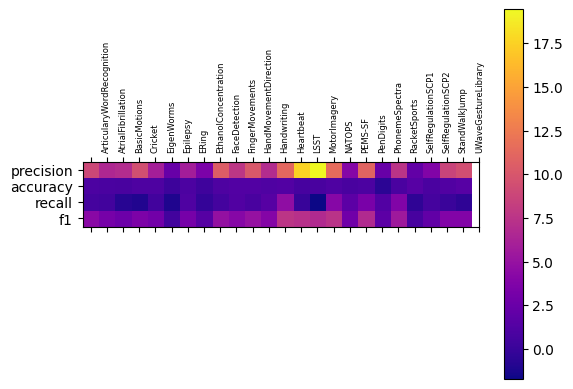

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(compare*100, cmap = 'plasma')
fig.colorbar(cax)

y_label =['precision', 'accuracy', 'recall', 'f1']

ax.set_yticks([i for i in range(len(y_label))])
ax.set_yticklabels(y_label)
ax.set_xticks([j for j in range(len(compare.columns)+1)])
ax.set_xticklabels(['']+list(compare.columns), rotation = 90)
ax.tick_params(axis= 'x', labelsize = '6')

plt.show

In [9]:
precision = compare.iloc[0,:]*100+ref['precision']*100

In [10]:
accuracy = compare.iloc[1,:]*100+ref['accuracy']*100

In [11]:
recall = compare.iloc[2,:]*100+ref['recall']*100

In [12]:
f1 = compare.iloc[3,:]*100+ref['f1']*100

C:\Users\hankk\AppData\Local\Temp\ipykernel_10756\2459155578.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(compare.columns , rotation = 90)


[Text(0, 0, 'ArticularyWordRecognition'),
 Text(1, 0, 'AtrialFibrillation'),
 Text(2, 0, 'BasicMotions'),
 Text(3, 0, 'Cricket'),
 Text(4, 0, 'EigenWorms'),
 Text(5, 0, 'Epilepsy'),
 Text(6, 0, 'ERing'),
 Text(7, 0, 'EthanolConcentration'),
 Text(8, 0, 'FaceDetection'),
 Text(9, 0, 'FingerMovements'),
 Text(10, 0, 'HandMovementDirection'),
 Text(11, 0, 'Handwriting'),
 Text(12, 0, 'Heartbeat'),
 Text(13, 0, 'LSST'),
 Text(14, 0, 'MotorImagery'),
 Text(15, 0, 'NATOPS'),
 Text(16, 0, 'PEMS-SF'),
 Text(17, 0, 'PenDigits'),
 Text(18, 0, 'PhonemeSpectra'),
 Text(19, 0, 'RacketSports'),
 Text(20, 0, 'SelfRegulationSCP1'),
 Text(21, 0, 'SelfRegulationSCP2'),
 Text(22, 0, 'StandWalkJump'),
 Text(23, 0, 'UWaveGestureLibrary')]

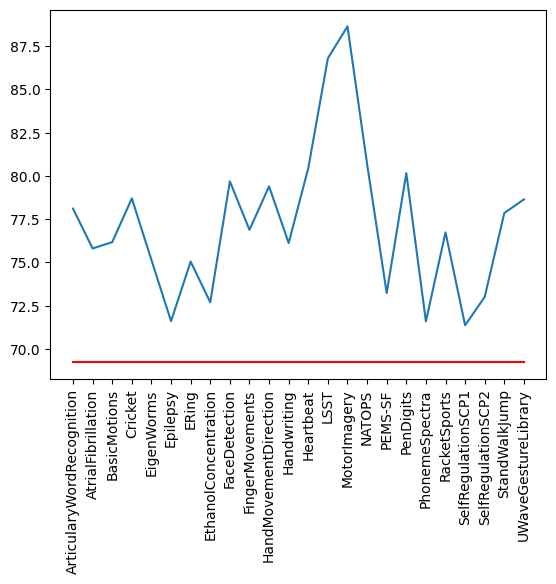

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(precision)
pre = [ref['precision']*100 for i in range(len(compare.columns))]
ax.plot(pre, c = 'r')
ax.set_xticklabels(compare.columns , rotation = 90)

C:\Users\hankk\AppData\Local\Temp\ipykernel_10756\2177787107.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(compare.columns , rotation = 90)


[Text(0, 0, 'ArticularyWordRecognition'),
 Text(1, 0, 'AtrialFibrillation'),
 Text(2, 0, 'BasicMotions'),
 Text(3, 0, 'Cricket'),
 Text(4, 0, 'EigenWorms'),
 Text(5, 0, 'Epilepsy'),
 Text(6, 0, 'ERing'),
 Text(7, 0, 'EthanolConcentration'),
 Text(8, 0, 'FaceDetection'),
 Text(9, 0, 'FingerMovements'),
 Text(10, 0, 'HandMovementDirection'),
 Text(11, 0, 'Handwriting'),
 Text(12, 0, 'Heartbeat'),
 Text(13, 0, 'LSST'),
 Text(14, 0, 'MotorImagery'),
 Text(15, 0, 'NATOPS'),
 Text(16, 0, 'PEMS-SF'),
 Text(17, 0, 'PenDigits'),
 Text(18, 0, 'PhonemeSpectra'),
 Text(19, 0, 'RacketSports'),
 Text(20, 0, 'SelfRegulationSCP1'),
 Text(21, 0, 'SelfRegulationSCP2'),
 Text(22, 0, 'StandWalkJump'),
 Text(23, 0, 'UWaveGestureLibrary')]

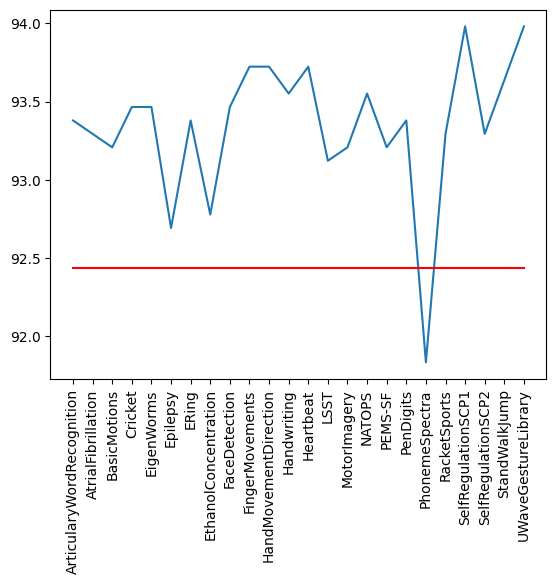

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(accuracy)
pre = [ref['accuracy']*100 for i in range(len(compare.columns))]
ax.plot(pre, c = 'r')
ax.set_xticklabels(compare.columns , rotation = 90)

C:\Users\hankk\AppData\Local\Temp\ipykernel_10756\1857590741.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(compare.columns , rotation = 90)


[Text(0, 0, 'ArticularyWordRecognition'),
 Text(1, 0, 'AtrialFibrillation'),
 Text(2, 0, 'BasicMotions'),
 Text(3, 0, 'Cricket'),
 Text(4, 0, 'EigenWorms'),
 Text(5, 0, 'Epilepsy'),
 Text(6, 0, 'ERing'),
 Text(7, 0, 'EthanolConcentration'),
 Text(8, 0, 'FaceDetection'),
 Text(9, 0, 'FingerMovements'),
 Text(10, 0, 'HandMovementDirection'),
 Text(11, 0, 'Handwriting'),
 Text(12, 0, 'Heartbeat'),
 Text(13, 0, 'LSST'),
 Text(14, 0, 'MotorImagery'),
 Text(15, 0, 'NATOPS'),
 Text(16, 0, 'PEMS-SF'),
 Text(17, 0, 'PenDigits'),
 Text(18, 0, 'PhonemeSpectra'),
 Text(19, 0, 'RacketSports'),
 Text(20, 0, 'SelfRegulationSCP1'),
 Text(21, 0, 'SelfRegulationSCP2'),
 Text(22, 0, 'StandWalkJump'),
 Text(23, 0, 'UWaveGestureLibrary')]

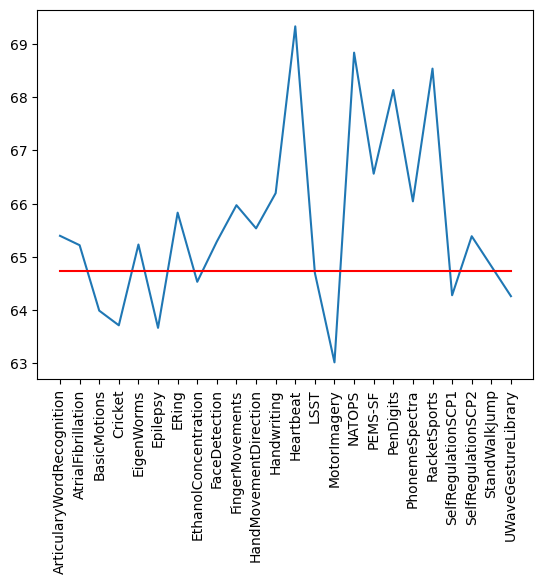

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(recall)
pre = [ref['recall']*100 for i in range(len(compare.columns))]
ax.plot(pre, c = 'r')
ax.set_xticklabels(compare.columns , rotation = 90)

C:\Users\hankk\AppData\Local\Temp\ipykernel_10756\6329502.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(compare.columns , rotation = 90)


[Text(0, 0, 'ArticularyWordRecognition'),
 Text(1, 0, 'AtrialFibrillation'),
 Text(2, 0, 'BasicMotions'),
 Text(3, 0, 'Cricket'),
 Text(4, 0, 'EigenWorms'),
 Text(5, 0, 'Epilepsy'),
 Text(6, 0, 'ERing'),
 Text(7, 0, 'EthanolConcentration'),
 Text(8, 0, 'FaceDetection'),
 Text(9, 0, 'FingerMovements'),
 Text(10, 0, 'HandMovementDirection'),
 Text(11, 0, 'Handwriting'),
 Text(12, 0, 'Heartbeat'),
 Text(13, 0, 'LSST'),
 Text(14, 0, 'MotorImagery'),
 Text(15, 0, 'NATOPS'),
 Text(16, 0, 'PEMS-SF'),
 Text(17, 0, 'PenDigits'),
 Text(18, 0, 'PhonemeSpectra'),
 Text(19, 0, 'RacketSports'),
 Text(20, 0, 'SelfRegulationSCP1'),
 Text(21, 0, 'SelfRegulationSCP2'),
 Text(22, 0, 'StandWalkJump'),
 Text(23, 0, 'UWaveGestureLibrary')]

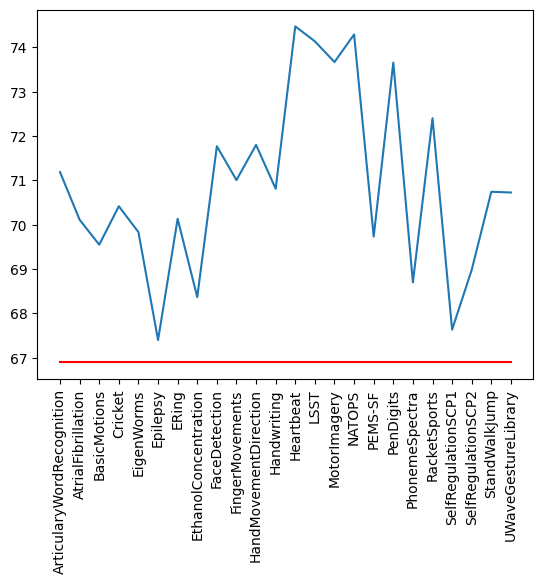

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(f1)
pre = [ref['f1']*100 for i in range(len(compare.columns))]
ax.plot(pre, c = 'r')
ax.set_xticklabels(compare.columns , rotation = 90)

#### Sorting with distance

In [17]:
if model_type == 'lstm':
    df = pd.read_csv('transfer_results_LSTM.csv', index_col = 0)
elif model_type == 'fcn':
    df = pd.read_csv('transfer_results.csv', index_col = 0)
df.fillna(999999999999, inplace = True)

In [18]:
sort_df = df.sort_values(by = ['label_imbalance'], ascending = False)
sort_df

,precision,accuracy,recall,f1,Type,Dist,label_imbalance,NumClasses
Heartbeat,11.226345,1.289768,4.595314,7.573353,Audio,3.452440e+03,2.578947,2
SelfRegulationSCP1,2.145204,1.547721,-0.450564,0.737573,EEG,4.694930e+03,1.015038,2
FingerMovements,7.660200,1.289768,1.239101,4.108363,EEG,1.249310e+03,1.012739,2
FaceDetection,10.465376,1.031814,0.557565,4.872025,EEG,1.357222e+03,1.000000,2
SelfRegulationSCP2,3.782366,0.859845,0.657305,2.085658,EEG,5.545115e+03,1.000000,2
MotorImagery,19.425131,0.773861,-1.709736,6.768714,EEG,9.165706e+03,1.000000,2
EigenWorms,5.918483,1.031814,0.501481,2.935771,Motion,1.000000e+12,0.753425,5
StandWalkJump,8.633479,1.203783,0.095222,3.845008,ECG,8.571429e+03,0.500000,3
AtrialFibrillation,6.583840,0.859845,0.488733,3.214443,ECG,4.338804e+03,0.500000,3
LSST,17.574486,0.687876,-0.031512,7.235759,Other,1.085082e+03,0.461950,14


C:\Users\hankk\AppData\Local\Temp\ipykernel_10756\70315631.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sort_df.index , rotation = 90)


[Text(0, 0, 'Heartbeat'),
 Text(1, 0, 'SelfRegulationSCP1'),
 Text(2, 0, 'FingerMovements'),
 Text(3, 0, 'FaceDetection'),
 Text(4, 0, 'SelfRegulationSCP2'),
 Text(5, 0, 'MotorImagery'),
 Text(6, 0, 'EigenWorms'),
 Text(7, 0, 'StandWalkJump'),
 Text(8, 0, 'AtrialFibrillation'),
 Text(9, 0, 'LSST'),
 Text(10, 0, 'RacketSports'),
 Text(11, 0, 'Epilepsy'),
 Text(12, 0, 'EthanolConcentration'),
 Text(13, 0, 'BasicMotions'),
 Text(14, 0, 'HandMovementDirection'),
 Text(15, 0, 'ERing'),
 Text(16, 0, 'NATOPS'),
 Text(17, 0, 'PEMS-SF'),
 Text(18, 0, 'UWaveGestureLibrary'),
 Text(19, 0, 'PenDigits'),
 Text(20, 0, 'Cricket'),
 Text(21, 0, 'Handwriting'),
 Text(22, 0, 'ArticularyWordRecognition'),
 Text(23, 0, 'PhonemeSpectra')]

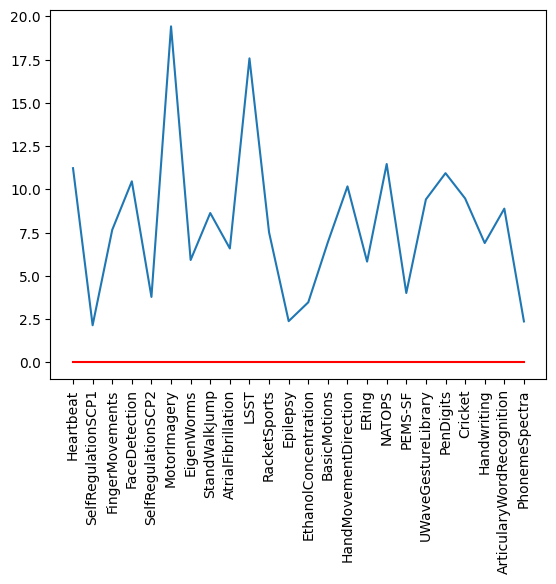

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(sort_df['precision'])
pre = [0 for i in range(len(compare.columns))]
ax.plot(pre, c = 'r')
ax.set_xticklabels(sort_df.index , rotation = 90)

C:\Users\hankk\AppData\Local\Temp\ipykernel_10756\1498966442.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sort_df.index , rotation = 90)


[Text(0, 0, 'Heartbeat'),
 Text(1, 0, 'SelfRegulationSCP1'),
 Text(2, 0, 'FingerMovements'),
 Text(3, 0, 'FaceDetection'),
 Text(4, 0, 'SelfRegulationSCP2'),
 Text(5, 0, 'MotorImagery'),
 Text(6, 0, 'EigenWorms'),
 Text(7, 0, 'StandWalkJump'),
 Text(8, 0, 'AtrialFibrillation'),
 Text(9, 0, 'LSST'),
 Text(10, 0, 'RacketSports'),
 Text(11, 0, 'Epilepsy'),
 Text(12, 0, 'EthanolConcentration'),
 Text(13, 0, 'BasicMotions'),
 Text(14, 0, 'HandMovementDirection'),
 Text(15, 0, 'ERing'),
 Text(16, 0, 'NATOPS'),
 Text(17, 0, 'PEMS-SF'),
 Text(18, 0, 'UWaveGestureLibrary'),
 Text(19, 0, 'PenDigits'),
 Text(20, 0, 'Cricket'),
 Text(21, 0, 'Handwriting'),
 Text(22, 0, 'ArticularyWordRecognition'),
 Text(23, 0, 'PhonemeSpectra')]

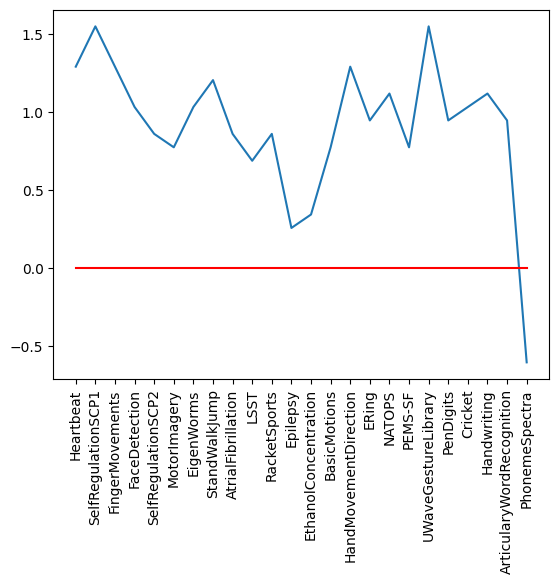

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(sort_df['accuracy'])
pre = [0 for i in range(len(compare.columns))]
ax.plot(pre, c = 'r')
ax.set_xticklabels(sort_df.index , rotation = 90)

C:\Users\hankk\AppData\Local\Temp\ipykernel_10756\750273320.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sort_df.index , rotation = 90)


[Text(0, 0, 'Heartbeat'),
 Text(1, 0, 'SelfRegulationSCP1'),
 Text(2, 0, 'FingerMovements'),
 Text(3, 0, 'FaceDetection'),
 Text(4, 0, 'SelfRegulationSCP2'),
 Text(5, 0, 'MotorImagery'),
 Text(6, 0, 'EigenWorms'),
 Text(7, 0, 'StandWalkJump'),
 Text(8, 0, 'AtrialFibrillation'),
 Text(9, 0, 'LSST'),
 Text(10, 0, 'RacketSports'),
 Text(11, 0, 'Epilepsy'),
 Text(12, 0, 'EthanolConcentration'),
 Text(13, 0, 'BasicMotions'),
 Text(14, 0, 'HandMovementDirection'),
 Text(15, 0, 'ERing'),
 Text(16, 0, 'NATOPS'),
 Text(17, 0, 'PEMS-SF'),
 Text(18, 0, 'UWaveGestureLibrary'),
 Text(19, 0, 'PenDigits'),
 Text(20, 0, 'Cricket'),
 Text(21, 0, 'Handwriting'),
 Text(22, 0, 'ArticularyWordRecognition'),
 Text(23, 0, 'PhonemeSpectra')]

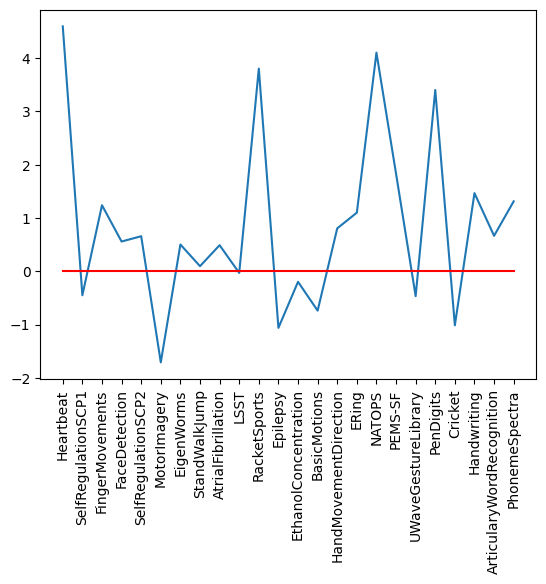

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(sort_df['recall'])
pre = [0 for i in range(len(compare.columns))]
ax.plot(pre, c = 'r')
ax.set_xticklabels(sort_df.index , rotation = 90)

C:\Users\hankk\AppData\Local\Temp\ipykernel_10756\1762079303.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sort_df.index , rotation = 90)


[Text(0, 0, 'Heartbeat'),
 Text(1, 0, 'SelfRegulationSCP1'),
 Text(2, 0, 'FingerMovements'),
 Text(3, 0, 'FaceDetection'),
 Text(4, 0, 'SelfRegulationSCP2'),
 Text(5, 0, 'MotorImagery'),
 Text(6, 0, 'EigenWorms'),
 Text(7, 0, 'StandWalkJump'),
 Text(8, 0, 'AtrialFibrillation'),
 Text(9, 0, 'LSST'),
 Text(10, 0, 'RacketSports'),
 Text(11, 0, 'Epilepsy'),
 Text(12, 0, 'EthanolConcentration'),
 Text(13, 0, 'BasicMotions'),
 Text(14, 0, 'HandMovementDirection'),
 Text(15, 0, 'ERing'),
 Text(16, 0, 'NATOPS'),
 Text(17, 0, 'PEMS-SF'),
 Text(18, 0, 'UWaveGestureLibrary'),
 Text(19, 0, 'PenDigits'),
 Text(20, 0, 'Cricket'),
 Text(21, 0, 'Handwriting'),
 Text(22, 0, 'ArticularyWordRecognition'),
 Text(23, 0, 'PhonemeSpectra')]

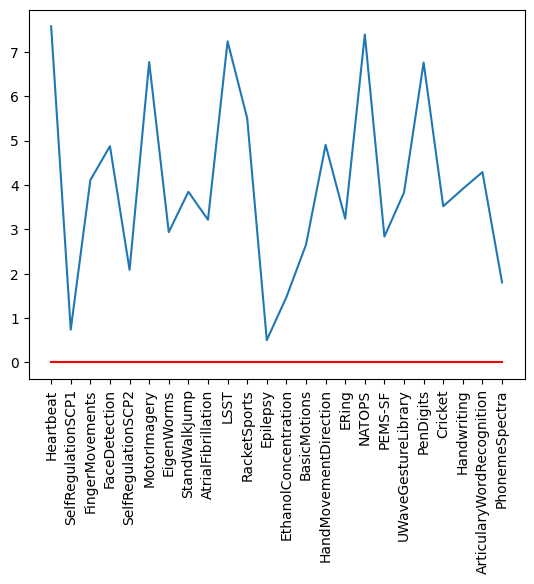

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(sort_df['f1'])
pre = [0 for i in range(len(compare.columns))]
ax.plot(pre, c = 'r')
ax.set_xticklabels(sort_df.index , rotation = 90)